# OpenCV Basics

In this notebook, I have worked on the basics of OpenCV, from simple tasks like reading images, changing the color code, drawing shapes on an image, and creating a simple application to draw on an image using a mouse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
img = cv2.imread('./DATA/00-puppy.jpg')

In [3]:
type(img)

numpy.ndarray

### An important step to change the color mapping: (BGR to RGB)

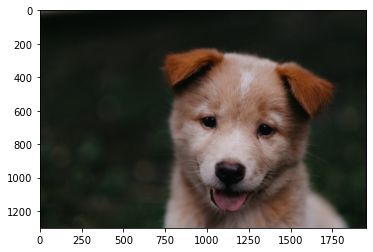

In [6]:
# MATPLOTLIB Original: RGB, but OpenCV original: BGR, so convert:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# Functions like the above need REASSIGNING

Matplot Lib expects RGB: RED GREEN BLUE
CV2 expects:        BGR: BLUE GREEN RED
So plt.imshow usually shows a Bluish tinge.

### Read an image directly as grayscale

In [7]:
image_grayscale = cv2.imread('./DATA/00-puppy.jpg', cv2.IMREAD_GRAYSCALE)

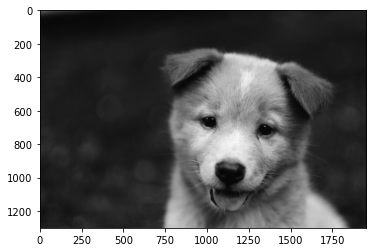

In [8]:
plt.imshow(image_grayscale, cmap = 'gray')

#### Resizing

In [9]:
resized_img = cv2.resize(img, (50, 1000))
# Resize only 2 dimensions possible
# OPPOSITE 

# First Param: '5' is for width as we see it, second param '1000' is for the height.
# Run this cell for more clarity.

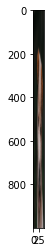

In [10]:
plt.imshow(resized_img)

#### Flipping

In [11]:
flipped_along_vertical = cv2.flip(img, 1)    # 1 for along vertical
flipped_along_horizontal = cv2.flip(img, 0)  # 0 for along horizontal
flipped_along_both = cv2.flip(img, -1)       # -1 for both

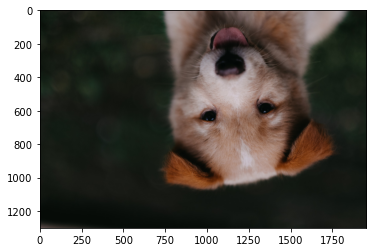

In [12]:
plt.imshow(flipped_along_horizontal)

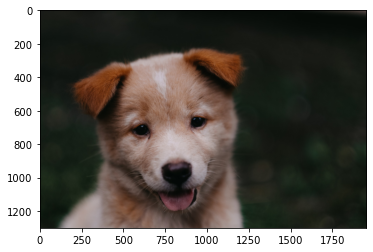

In [13]:
plt.imshow(flipped_along_vertical)

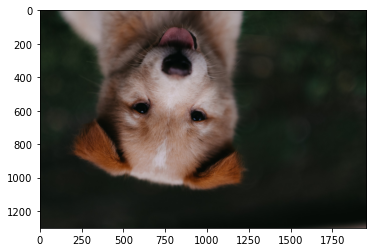

In [14]:
plt.imshow(flipped_along_both)

In [15]:
# Saving the image
cv2.imwrite('./DATA/flipped_both_puppy.jpg', flipped_along_both)

True

### Resizing an image in Jupyter Notebook (Standard Code)

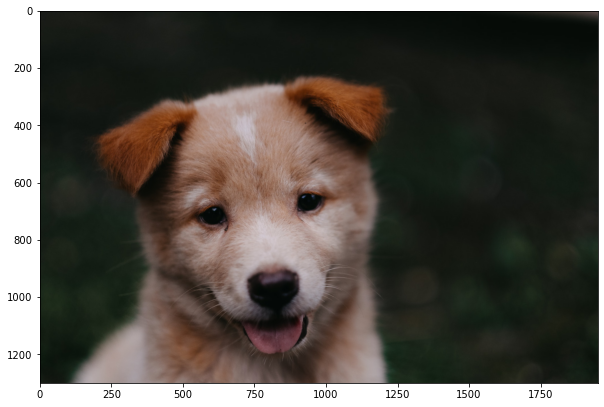

In [16]:
# Resizing in the Jupyter Notebook:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.imshow(flipped_along_vertical)

# Shapes

In [17]:
blank = np.zeros(shape = (512, 512, 3), dtype = np.int16)

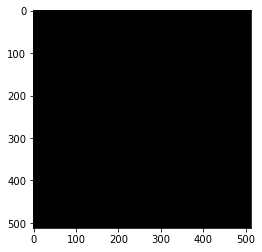

In [18]:
plt.imshow(blank)

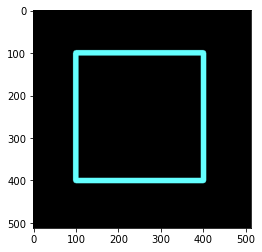

In [19]:
# Rectangle : Define TOP RIGHT and BOTTOM LEFT.
cv2.rectangle(blank, (100, 100), (400, 400), color = (100, 255, 255), thickness = 12)
plt.imshow(blank)

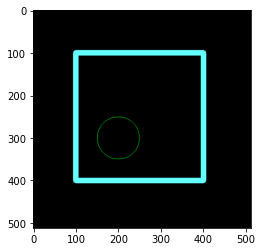

In [20]:
cv2.circle(blank, center = (200, 300), radius = 50, color = (0, 255, 0), thickness = 1)
plt.imshow(blank)
# TO FILL IN the image: Thickness = -1 fills in the entire thing.

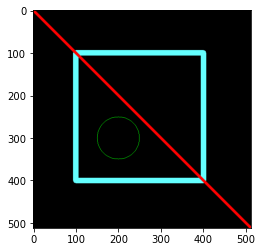

In [21]:
cv2.line(blank, (0, 0), (512, 512), color = (255, 0, 0), thickness = 5)
plt.imshow(blank)

### NOTE that drawing shapes is IN-PLACE

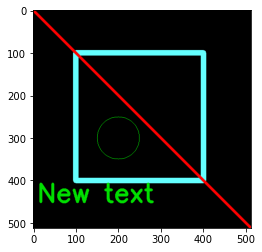

In [22]:
cv2.putText(blank, text = "New text", org = (10, 450), fontFace = cv2.FONT_ITALIC, fontScale = 2, color = (0, 223, 0), thickness = 5, lineType = cv2.LINE_AA)
plt.imshow(blank)

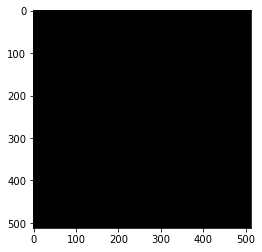

In [23]:
blank = np.zeros((512, 512, 3))
plt.imshow(blank)

### Polygon (Polylines)

In [24]:
vertices = np.array([[100, 300], [20, 40], [30, 35], [512, 255], [380, 380], [456, 123]], dtype = np.int32)

In [25]:
points = vertices.reshape((-1, 1, 2)) # For the color channels to make sense

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


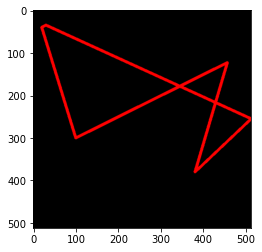

In [26]:
cv2.polylines(blank, [points], isClosed = True, color = (255, 0, 0), thickness = 5)
plt.imshow(blank)

### Creating windows to show images, drawing shapes on them with Mouse

Run the following cell here, or as a simple python script. This opens an application, where you may click left mouse button to draw a circle, and right to draw a rectangle with the center being the point you clicked on

In [28]:
# Circle, rectangle, simple
import numpy as np
import cv2

def draw_circle(event, x, y, flags, param):
    if(event == cv2.EVENT_LBUTTONDOWN):
        cv2.circle(new_img, (x, y), radius = 50, color = (255, 255, 255), thickness = -1)
    elif(event == cv2.EVENT_RBUTTONDOWN):
        cv2.rectangle(new_img, (x, y), (x + 100, y + 100), color = (255, 0, 0), thickness = 50)

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)


new_img = np.zeros((600, 600, 3), dtype = np.int8)

while(1):
    cv2.imshow('my_drawing', new_img)
    
    if(cv2.waitKey(20) & 0xFF == 27):
        break

cv2.destroyAllWindows()

The following cell creates a similar application, where we can drag-drop and draw a rectangle on the application. (However, it doesn't allow reducing the size, i.e, after you have drawn a rectangle, you can't reduce it's size)

In [29]:
# Drag - Drop Rectangle
import numpy as np
import cv2

# True when mouse is click and drag, else false
drawing = False
start_x, start_y = -1, -1


def draw_rectangle(event, x, y, flags, param):
    global drawing, start_x, start_y
    
    if(event == cv2.EVENT_LBUTTONDOWN):
        drawing = True
        start_x, start_y = x, y
    
    elif(event == cv2.EVENT_MOUSEMOVE):
        if(drawing == True):
            cv2.rectangle(new_img, (start_x, start_y), (x, y), (0, 0, 255), -1)
    
    elif(event == cv2.EVENT_LBUTTONUP):
        drawing = False


cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)

new_img = np.zeros((600, 600, 3), dtype = np.int8)

while(True):
    cv2.imshow('my_drawing', new_img)
    
    if(cv2.waitKey(20) & 0xFF == 27):
        break

cv2.destroyAllWindows()